In [7]:
import numpy
import numpy as np
import pandas
import cv2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from keras import backend as K
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects

In [5]:
def swish(x):
    return (K.sigmoid(x) * x)

In [8]:
get_custom_objects().update({'swish': swish})

In [2]:
# load dataset
images = []
labels = []
from imutils import paths
for imagePath in paths.list_images("/home/vishay/Downloads/tipr-second-assignment-master/data/MNIST"):
    images.append(cv2.imread(imagePath,0).flatten())
    labels.append(imagePath.split('/')[-2])
images = np.array(images)
labels = np.array(labels,dtype = int)

In [3]:
dummy_y = np_utils.to_categorical(labels)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, dummy_y, test_size=0.33, random_state=42)

In [9]:
def build_model():
    global hidden_layer_sizes
    global funct
    model = Sequential()

    model.add(Dense(hidden_layer_sizes[0], input_dim=784))
    model.add(Activation(funct))

    for layer_size in hidden_layer_sizes[1:]:
        model.add(Dense(layer_size))
        model.add(Activation(funct))

    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
activation = ['sigmoid','tanh','relu','swish']

In [11]:
accuracy = []
f1micro = []
f1macro = []
for i in activation:
    funct = i
    hidden_layer_sizes = [64]*5
               
    estimator = KerasClassifier(build_fn=build_model, epochs=3, batch_size=50, verbose=1)
    estimator.fit(X_train,y_train)
    s = estimator.predict(X_test)
    label = [np.argmax(y_test[i,:]) for i in range(len(y_test))]
    label = np.array(label)
    total = 0
    correct = 0
    for i in range(len(s)):
        total += 1
        if s[i] == label[i]:
            correct += 1
    acc = correct/total

    f1mi = f1_score(label, s, average='macro',labels=np.unique(s) )  
    f1ma = f1_score(label, s, average='micro',labels=np.unique(s)) 
    
    accuracy.append(acc)
    f1micro.append(f1mi)
    f1macro.append(f1ma)


Epoch 1/3
28140/28140 [==============================] - 1s 52us/step - loss: 1.6455 - acc: 0.4241
Epoch 2/3
28140/28140 [==============================] - 1s 46us/step - loss: 0.9429 - acc: 0.6935
Epoch 3/3
13860/13860 [==============================] - 0s 17us/step
Epoch 1/3
28140/28140 [==============================] - 2s 57us/step - loss: 0.8214 - acc: 0.7302
Epoch 2/3
28140/28140 [==============================] - 1s 51us/step - loss: 0.6137 - acc: 0.7957
Epoch 3/3
13860/13860 [==============================] - 0s 20us/step
Epoch 1/3
28140/28140 [==============================] - 1s 53us/step - loss: 1.2132 - acc: 0.7950
Epoch 2/3
28140/28140 [==============================] - 1s 47us/step - loss: 0.2738 - acc: 0.9205
Epoch 3/3
13860/13860 [==============================] - 0s 22us/step
Epoch 1/3
28140/28140 [==============================] - 2s 57us/step - loss: 1.9917 - acc: 0.7508
Epoch 2/3
28140/28140 [==============================] - 1s 47us/step - loss: 0.2897 - acc: 0.918

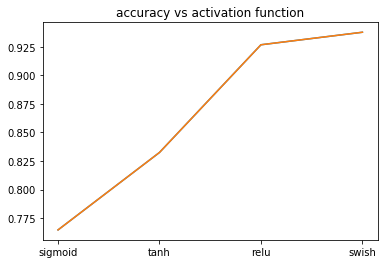

In [21]:
plt.plot(range(4),accuracy)

plt.title("accuracy vs activation function")
x = np.array(range(4))
y = np.array(accuracy)
plt.xticks(x, activation)
plt.plot(x, y)
plt.show()

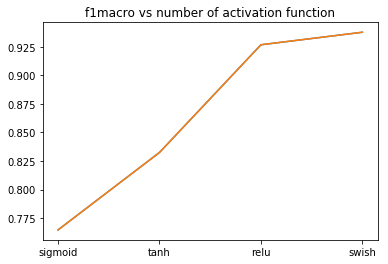

In [22]:
plt.plot(range(4),f1macro)

plt.title("f1macro vs number of activation function")
x = np.array(range(4))
y = np.array(f1macro)
plt.xticks(x, activation)
plt.plot(x, y)
plt.show()

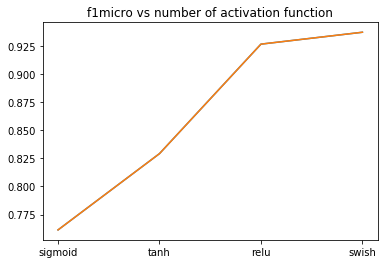

In [23]:
plt.plot(range(4),f1micro)

plt.title("f1micro vs number of activation function")
x = np.array(range(4))
y = np.array(f1micro)
plt.xticks(x, activation)
plt.plot(x, y)
plt.show()

In [13]:
accuracy

[0.7646464646464647,
 0.8324675324675325,
 0.9267676767676768,
 0.9377344877344878]

In [15]:
f1macro

[0.7646464646464646,
 0.8324675324675325,
 0.9267676767676768,
 0.9377344877344878]

In [16]:
f1micro

[0.7613616700563786,
 0.8291322313878544,
 0.9263919957974787,
 0.9369559142819147]